In [14]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Sampling_Data\Smote_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19350 entries, 0 to 19349
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           19350 non-null  int64  
 1   id                   19350 non-null  float64
 2   ref                  19350 non-null  float64
 3   subtitle             19350 non-null  float64
 4   creatorname          19350 non-null  float64
 5   totalbytes           19350 non-null  float64
 6   lastupdated          19350 non-null  float64
 7   downloadcount        19350 non-null  float64
 8   title                19350 non-null  float64
 9   tags                 19350 non-null  float64
 10  anomaly              19350 non-null  float64
 11  download_view_ratio  19350 non-null  float64
 12  num_tags             19350 non-null  float64
 13  title_length         19350 non-null  float64
 14  subtitle_length      19350 non-null  float64
 15  creator_popularity   19350 non-null 

In [2]:
df["cluster"].unique()

array([0, 1, 2, 4, 3])

# Shap values (Explainable AI-----XAI)

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import shap
import matplotlib.pyplot as plt

c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# --- Copy of your df ---
df_copy = df.copy()

# --- Features and target ---
X = df_copy.drop(columns=['cluster'], errors='ignore')
y = df_copy['cluster']
# --- Identify numeric and categorical features ---
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [6]:
# --- Simple label encoding for categorical inside a function ---
def label_encode_df(df, cat_cols):
    df_encoded = df.copy()
    encoders = {}
    for col in cat_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        encoders[col] = le
    return df_encoded, encoders

X_encoded, encoders = label_encode_df(X, categorical_features)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report

# --- Pipeline with scaling numeric features only ---
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features)
], remainder='passthrough')  # leave label-encoded categorical as-is

clf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=None, random_state=42, n_estimators=100))
])

# --- Train model ---
clf_pipeline.fit(X_train, y_train)

# --- Evaluate ---
y_train_pred = clf_pipeline.predict(X_train)
y_test_pred = clf_pipeline.predict(X_test)

print("🎯 Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("🎯 Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\n⚡ Train F1-score (macro):", f1_score(y_train, y_train_pred, average='macro'))
print("⚡ Test F1-score (macro):", f1_score(y_test, y_test_pred, average='macro'))

print("\n📋 Classification Report (Test set):")
print(classification_report(y_test, y_test_pred))


🎯 Train Accuracy: 1.0
🎯 Test Accuracy: 0.9984496124031008

⚡ Train F1-score (macro): 1.0
⚡ Test F1-score (macro): 0.9984476177533314

📋 Classification Report (Test set):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1149
           1       0.99      1.00      1.00      1173
           2       1.00      1.00      1.00      1130
           3       1.00      1.00      1.00      1195
           4       1.00      1.00      1.00      1158

    accuracy                           1.00      5805
   macro avg       1.00      1.00      1.00      5805
weighted avg       1.00      1.00      1.00      5805



# --- SHAP explanation ---

In [ ]:

# Preprocess test set
X_test_preprocessed = overfit_model.named_steps['preprocess'].transform(X_test)

explainer = shap.TreeExplainer(overfit_model.named_steps['regressor'])
shap_values = explainer.shap_values(X_test_preprocessed)

# --- Waterfall plot for first sample ---
shap.waterfall_plot(shap.Explanation(
    values=shap_values[0],
    base_values=explainer.expected_value,
    data=X_test_preprocessed[0],
    feature_names=list(numeric_features) + list(categorical_features)
))

# --- Summary plot ---
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=list(numeric_features) + list(categorical_features))

ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (20, 5)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

In [18]:
from sklearn.datasets import fetch_covtype
import pandas as pd
import shap
from sklearn.linear_model import LogisticRegression

# Datasetni yuklash
data = fetch_covtype(as_frame=True)
X = data.data
y = data.target

# 1000 ta namunani olish
X = shap.utils.sample(X, 1000, random_state=42)
y = y[:1000]

# Modelni o‘rganish
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X, y)

print("Model tayyor!")


c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model tayyor!


c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
import pandas as pd

print("Model coefficients (har bir sinf uchun):\n")

coef_df = pd.DataFrame(model.coef_, columns=X.columns)
coef_df['Class'] = range(1, coef_df.shape[0] + 1)

print(coef_df.round(5))


Model coefficients (har bir sinf uchun):

   Elevation   Aspect    Slope  Horizontal_Distance_To_Hydrology  \
0    0.00030  0.00084 -0.00695                          -0.00008   
1    0.00004  0.00005  0.01252                          -0.00013   
2   -0.00034 -0.00089 -0.00557                           0.00021   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                         0.00074                         -0.00009   
1                        -0.00130                          0.00004   
2                         0.00056                          0.00006   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       -0.01162         0.01464       -0.01280   
1        0.00152        -0.00037        0.00100   
2        0.01009        -0.01427        0.01179   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type_31  Soil_Type_32  \
0                             0.00002  ...      -0.00035      -0.00271   
1                             0.00002  ...       0.

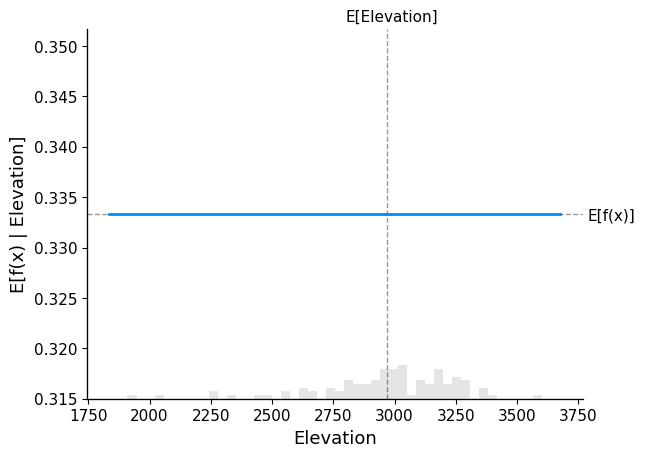

In [22]:
import shap
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import pandas as pd

# 1️⃣ Datasetni yuklash
data = fetch_covtype(as_frame=True)
X = data.data
y = data.target

# 2️⃣ Namuna olish (1000 ta)
X = shap.utils.sample(X, 1000, random_state=42)
y = y[:1000]

# 3️⃣ Model (scaling + logistic regression)
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=2000, solver="lbfgs")
)
model.fit(X, y)

# 4️⃣ Background namunalar
X100 = shap.utils.sample(X, 100, random_state=0)

# 5️⃣ Partial dependence plot
# ⚠️ "MedInc" o'rniga "Elevation" (mavjud ustun) ishlatamiz
shap.partial_dependence_plot(
    "Elevation",                # mavjud ustun nomi
    model.predict_proba,        # classification uchun yaxshiroq
    X100,                       # background namunalar
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)



=== Partial Dependence Plot for Class 1 ===


PermutationExplainer explainer: 1001it [00:28, 22.87it/s]                         


ValueError: too many values to unpack (expected 1)

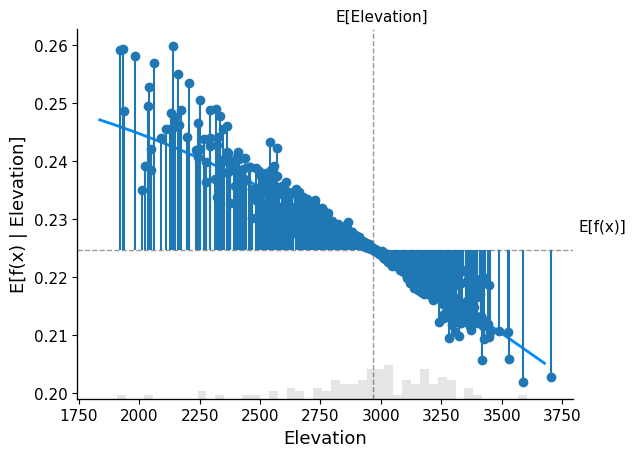

In [30]:
import shap
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Dataset
data = fetch_covtype(as_frame=True)
X = data.data
y = data.target

# Namuna olish
X = shap.utils.sample(X, 1000, random_state=42)
y = y[:1000]

# Model
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=2000, solver="lbfgs")
)
model.fit(X, y)

# Background sample
X100 = shap.utils.sample(X, 100, random_state=0)

# Loop orqali har bir klass uchun PDP
for class_idx in range(7):
    print(f"\n=== Partial Dependence Plot for Class {class_idx+1} ===")
    
    # Klassni tanlash: Explainer faqat bitta klass uchun predict_proba[:, class_idx] ishlatadi
    explainer = shap.Explainer(lambda x: model.predict_proba(x)[:, class_idx], X100)
    shap_values_class = explainer(X)
    
    # Partial dependence plot
    shap.partial_dependence_plot(
        "Elevation",                  # bitta feature
        lambda x: model.predict_proba(x)[:, class_idx],
        X100,
        shap_values=shap_values_class,
        ice=False,
        model_expected_value=True,
        feature_expected_value=True
    )
    plt.show()


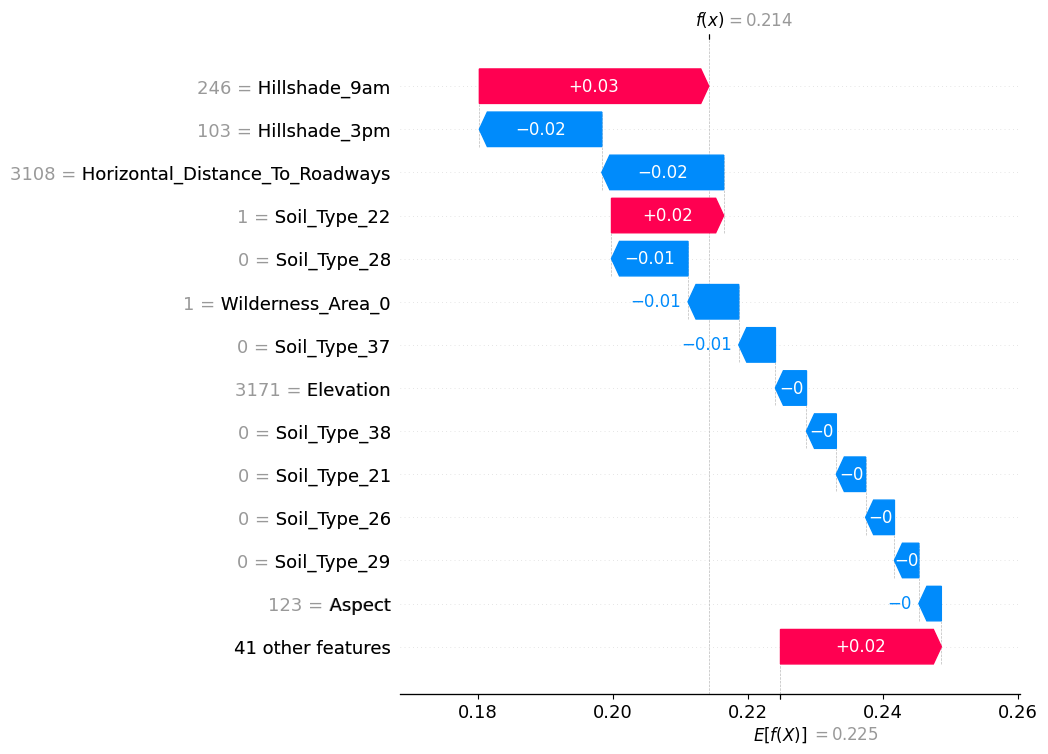

In [31]:
import shap

sample_ind = 20  # namuna indeksi

# Lambda orqali faqat 0-klass predict_proba
explainer = shap.Explainer(lambda x: model.predict_proba(x)[:, 0], X100)
shap_values_class1 = explainer(X.iloc[[sample_ind]])

# Waterfall plot
shap.plots.waterfall(shap_values_class1[0], max_display=14)
